In [1]:
# Aditya Desai
# BE-A-16
# DL EXPT:02

In [1]:
from keras.datasets import imdb

In [2]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Verify the maximum word index
max_index = max([max(sequence) for sequence in train_data])
print("Maximum word index in training data:", max_index)

Maximum word index in training data: 9999


In [4]:
# Decode the first review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [5]:
# Decode the review
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Decoded review:", decoded_review)

Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

In [6]:
# Step 2: Preparing the Data
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set specific indices of results[i] to 1s
    return results

In [8]:
# Vectorize training and testing data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
# Step 3: Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 4: Compiling the model
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [11]:
# Step 5: Setting up Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# Step 6: Training our model
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - binary_accuracy: 0.6912 - loss: 0.6113 - val_binary_accuracy: 0.8406 - val_loss: 0.4222
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - binary_accuracy: 0.8853 - loss: 0.3532 - val_binary_accuracy: 0.8718 - val_loss: 0.3307
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - binary_accuracy: 0.9163 - loss: 0.2538 - val_binary_accuracy: 0.8881 - val_loss: 0.2845
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.9381 - loss: 0.1964 - val_binary_accuracy: 0.8883 - val_loss: 0.2793
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.9459 - loss: 0.1689 - val_binary_accuracy: 0.8877 - val_loss: 0.2787
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - binary_accuracy: 0.9568 - loss: 0.1409 - val_binary_accuracy: 0.8889 - val_loss: 0.2814
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - binary_accuracy: 0.9681 - loss: 0.1153 - val_binary_accuracy: 0.8845 - val_loss: 0.2929
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [14]:
# Step 7: Plot Training and Validation Losses and Accuracy
import matplotlib.pyplot as plt

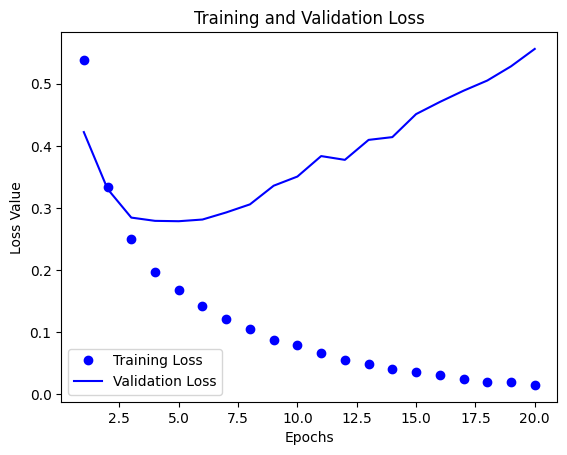

In [15]:
# Plotting losses
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

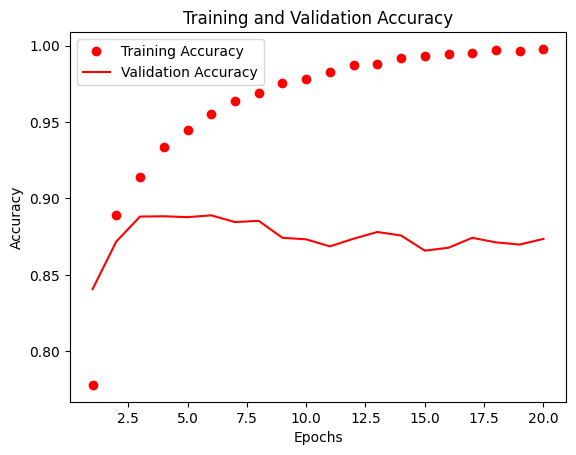

In [16]:
# Plotting accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Step 8: Retraining our model
model.fit(partial_X_train,
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - binary_accuracy: 0.9994 - loss: 0.0094 - val_binary_accuracy: 0.8704 - val_loss: 0.5759
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9974 - loss: 0.0123 - val_binary_accuracy: 0.8720 - val_loss: 0.5981
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9998 - loss: 0.0064 - val_binary_accuracy: 0.8707 - val_loss: 0.6164


In [18]:
# Step 9: Model Evaluation
# Making predictions for testing data
result = model.predict(X_test)

# Convert predictions to binary
y_pred = (result > 0.5).astype(int).flatten()

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 0.14236000180244446
